In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!wget https://www.dropbox.com/scl/fi/vv2w9v890lgd2h9kovv7r/glove.6B.50d1.txt?rlkey=rxrdka5i47xxfnszawwuub2r8&dl=0

--2024-10-28 08:24:12--  https://www.dropbox.com/scl/fi/vv2w9v890lgd2h9kovv7r/glove.6B.50d1.txt?rlkey=rxrdka5i47xxfnszawwuub2r8
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3673678d71338613db45c15d7c.dl.dropboxusercontent.com/cd/0/inline/CdTey7XqWH4PbPD6NdrxMvWoctOP3XrAaSbNL-gcm_yEP7I-HpdoH4k-QFnNWrG7cPPTI5u8M0NrtnhxknBHi3xtXWw2SB1OR2rA2fdB454zp9_VwHp8bASxD9V_opAP_OzzH3Qhc5FT9kykZHADbweQ/file# [following]
--2024-10-28 08:24:13--  https://uc3673678d71338613db45c15d7c.dl.dropboxusercontent.com/cd/0/inline/CdTey7XqWH4PbPD6NdrxMvWoctOP3XrAaSbNL-gcm_yEP7I-HpdoH4k-QFnNWrG7cPPTI5u8M0NrtnhxknBHi3xtXWw2SB1OR2rA2fdB454zp9_VwHp8bASxD9V_opAP_OzzH3Qhc5FT9kykZHADbweQ/file
Resolving uc3673678d71338613db45c15d7c.dl.dropboxusercontent.com (uc3673678d71338613db45c15d7c.dl.dropboxusercontent.com)... 162.125.80.1

In [ ]:
!pip install Keras-Preprocessing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.3 MB/s eta 0:00:00


In [ ]:
!wget https://www.dropbox.com/scl/fo/u6cxdy4afbot71qlx1htf/h?rlkey=qra18nhi1jpk2m7r0vv1umr9s&dl=0

--2024-10-28 08:24:18--  https://www.dropbox.com/scl/fo/u6cxdy4afbot71qlx1htf/h?rlkey=qra18nhi1jpk2m7r0vv1umr9s
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc890777a0e2225b0ca6f781ef1d.dl.dropboxusercontent.com/zip_download_get/CAvH_29wcXAGxH2Scml-6WzAGcMKgTqRZxrns4NsGsS8EMInno6b67REMvfHh05o9RFI-9nYQs4SLKoEnZEAFEhl2GszWvx-HY6Ak6A6fr2cNg# [following]
--2024-10-28 08:24:21--  https://uc890777a0e2225b0ca6f781ef1d.dl.dropboxusercontent.com/zip_download_get/CAvH_29wcXAGxH2Scml-6WzAGcMKgTqRZxrns4NsGsS8EMInno6b67REMvfHh05o9RFI-9nYQs4SLKoEnZEAFEhl2GszWvx-HY6Ak6A6fr2cNg
Resolving uc890777a0e2225b0ca6f781ef1d.dl.dropboxusercontent.com (uc890777a0e2225b0ca6f781ef1d.dl.dropboxusercontent.com)... 162.125.81.15, 2620:100:6030:15::a27d:500f
Connecting to uc890777a0e2225b0ca6f781ef1d.dl.dropboxusercontent.com 

In [ ]:
!unzip h?rlkey=qra18nhi1jpk2m7r0vv1umr9s

Streaming output truncated to the last 5000 lines.
 extracting: Flickr_Data/Flickr_Data/Images/3435015880_eda46ff50f.jpg  
 extracting: Flickr_Data/Flickr_Data/Images/3475005101_6f6e437459.jpg  
 extracting: Flickr_Data/Flickr_Data/Images/3479050296_65bcea69a0.jpg  
 extracting: Flickr_Data/Flickr_Data/Images/3486538055_bcf4d3dfda.jpg  
 extracting: Flickr_Data/Flickr_Data/Images/3494105596_f05cb0d56f.jpg  
 extracting: Flickr_Data/Flickr_Data/Images/3500136982_bf7a85531e.jpg  
 extracting: Flickr_Data/Flickr_Data/Images/3521201948_9049197f20.jpg  
 extracting: Flickr_Data/Flickr_Data/Images/3529211822_1dabdb3a9c.jpg  
 extracting: Flickr_Data/Flickr_Data/Images/3532205154_5674b628ea.jpg  
 extracting: Flickr_Data/Flickr_Data/Images/3532587748_7e64bb223a.jpg  
 extracting: Flickr_Data/Flickr_Data/Images/3540598210_972f0ff573.jpg  
 extracting: Flickr_Data/Flickr_Data/Images/3547000169_40191e02ca.jpg  
 extracting: Flickr_Data/Flickr_Data/Images/3549011001_26cace3646.jpg  
 extracting: 

In [ ]:
####IMPORTS###
import numpy as np
import tensorflow.keras as keras
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
import collections
import tensorflow_hub as hub
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input
from tensorflow.keras.utils import plot_model
from keras.layers import Add
from keras.preprocessing import image
import nltk
from nltk.corpus import stopwords
from tensorflow.keras.utils import pad_sequences
import pickle
from keras.models import Model, load_model
from keras.layers import Input,Dense, Dropout, Embedding, LSTM ,GRU
from keras.utils import to_categorical

In [ ]:
def read_text(path):
  with open(path,'r') as f:
    captions = f.read()
  return captions

def clean_text(sentence):
  sentence = sentence.lower()
  sentence = re.sub("[^a-z]+"," ",sentence)
  sentence = sentence.split()

  sentence = [s for s in sentence if len(s)>1]
  sentence = " ".join(sentence)
  return sentence

def get_Cleaned_Descriptions(captions):
  descriptions = {}

  for caption in captions:
    id,cap = caption.split('\t')
    id = id[:-2]
    if descriptions.get(id) is None:
      descriptions[id] = []
    descriptions[id].append(cap)
  for key,caption_list in descriptions.items():
    for i in range(len(caption_list)):
      caption_list[i] = clean_text(caption_list[i])
  return descriptions

def get_Vocabulary(descriptions):
  vocab = set()
  for key in descriptions.keys():
    [vocab.update(sentence.split()) for sentence in descriptions[key]]
  return vocab

def get_TotalWords(descriptions):
  total_words = []
  for key in descriptions.keys():
    [total_words.append(i) for sentence in descriptions[key] for i in sentence.split()]
  counter = collections.Counter(total_words)
  freq_counter = dict(counter)
  sorted_freq_counts = sorted(freq_counter.items(),reverse = True, key = lambda x:x[1])
  threshold = 10
  sorted_freq_counts = [x for x in sorted_freq_counts if x[1]>threshold]
  total_words =[x[0] for x in sorted_freq_counts]
  return total_words,sorted_freq_counts;

def add_StartEndTokens(descriptions, data):
  train_desc = {}

  for _id in data:
    if _id in descriptions:
      train_desc[_id] = []
      for cap in descriptions[_id]:
        cap_to_add = "startseq "+cap+ " endseq"
        train_desc[_id].append(cap_to_add)
    else:
      print(f"Missing description for image ID: {_id}")
  return train_desc

def get_word_to_idx(total_words):
  word_to_idx = {}
  idx_to_word = {}
  for i,word in enumerate(total_words):
    word_to_idx[word] = i+1
    idx_to_word[i+1] = word
  print(len(word_to_idx))
  word_to_idx['startseq'] = 1846
  word_to_idx['endseq'] = 1847
  idx_to_word[1846] = 'startseq'
  idx_to_word[1847] = 'endseq'
  vocab_size = len(word_to_idx)+1
  return word_to_idx,idx_to_word,vocab_size


import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

def data_generator(train_desc, train_encoded, word_to_idx, batch_size, maxlength=35):
    x1, x2, y = [], [], []
    n = 0
    while True:
        for key, caps in train_desc.items():
            photo = train_encoded[key]
            if photo.shape != (4096,):
                photo = np.reshape(photo, (4096,))
            for cap in caps:
                seq = [word_to_idx[word] for word in cap.split() if word in word_to_idx]
                for i in range(1, len(seq)):
                    xi = seq[0:i]
                    yi = seq[i]
                    xi = pad_sequences([xi], maxlen=maxlength, value=0, padding='post')[0]
                    yi = to_categorical([yi], num_classes=vocab_size)[0]
                    x1.append(photo)  # Image features
                    x2.append(xi)     # Text input sequence
                    y.append(yi)      # Target word (one-hot encoded)

            n += 1
            if n == batch_size:
                yield (np.array(x1), np.array(x2)), np.array(y)
                x1, x2, y = [], [], []
                n = 0

# Wrap generator in a tf.data.Dataset
def create_dataset(train_desc, train_encoded, word_to_idx, batch_size, maxlength=35):
    dataset = tf.data.Dataset.from_generator(
        lambda: data_generator(train_desc, train_encoded, word_to_idx, batch_size, maxlength),
        output_signature=(
            (tf.TensorSpec(shape=(None, train_encoded[next(iter(train_encoded))].shape[0]), dtype=tf.float32),
             tf.TensorSpec(shape=(None, maxlength), dtype=tf.float32)),
            tf.TensorSpec(shape=(None, vocab_size), dtype=tf.float32)
        )
    )
    return dataset

def train():
    loss = []
    dataset = create_dataset(train_desc, train_encoded, word_to_idx, batch_size, maxlength=35)

    for i in range(epochs):
        history = model.fit(dataset, epochs=1, steps_per_epoch=steps_per_epoch, verbose=1)
        loss.append(history.history['loss'][0])

        if (i+1) % 10 == 0:
            model.save('/content/drive/MyDrive/model_weight_VGG+GRU_EARLY_model_' + str(i) + '.h5')
    dict_loss = {'loss_VGG+GRU+late': loss}
    df = pd.DataFrame(dict_loss)
    df.to_csv('/content/drive/MyDrive/loss_late.csv')
    plt.plot(loss)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.show()

# Embeddings will be added into the fusion model
def get_embedding_idx(glove_file):
  embedding_idx = {}

  for line in glove_file:
    values = line.split()
    word = values[0]
    word_embeddings = np.array(values[1:],dtype = 'float')
    embedding_idx[word] = word_embeddings
  return embedding_idx

def get_embedding_matrix(vocab_size,embedding_idx):
  embed_dim = 50
  matrix = np.zeros((vocab_size,embed_dim))
  for word,idx in word_to_idx.items():
    embed_vec = embedding_idx.get(word)
    if embed_vec is not None:
      matrix[idx] = embed_vec
  return matrix


In [ ]:
path = "/content/Flickr_Data/Flickr_Data/Flickr_TextData/Flickr8k.token.txt"
captions = read_text(path)

In [ ]:
captions = captions.split('\n')
captions = captions[:-1]
print(len(captions))

40460


In [ ]:
train_path = "/content/Flickr_Data/Flickr_Data/Flickr_TextData/Flickr_8k.trainImages.txt"
test_path = "/content/Flickr_Data/Flickr_Data/Flickr_TextData/Flickr_8k.testImages.txt"

In [ ]:
train_data = read_text(train_path)
test_data = read_text(test_path)
train_data = train_data.split('\n')
test_data = test_data.split('\n')
train_data = train_data[:-1]
test_data = test_data[:-1]

In [ ]:
descriptions = get_Cleaned_Descriptions(captions)
vocabulary = get_Vocabulary(descriptions)
total_words,sorted_freq_counts = get_TotalWords(descriptions)
add_StartEndTokens(descriptions,train_data)
add_StartEndTokens(descriptions,test_data)
word_to_idx,idx_to_word,vocab_size = get_word_to_idx(total_words)

1845


In [ ]:
print(descriptions['2513260012_03d33305cf.jpg'])
print(len(vocabulary))
print(len(total_words))
print(len(word_to_idx))
print(len(idx_to_word))
print(vocab_size)

['black dog is running after white dog in the snow', 'black dog chasing brown dog through snow', 'two dogs chase each other across the snowy ground', 'two dogs play together in the snow', 'two dogs running through low lying body of water']
8424
1845
1847
1847
1848


In [ ]:
with open('/content/drive/MyDrive/Images_Encoded/encoded_training_features_VGG.pkl', 'rb') as file:
    train_encoded = pickle.load(file)

In [ ]:
print(train_encoded['2513260012_03d33305cf.jpg'].shape)

(4096,)


In [ ]:
glove_file = open("/content/glove.6B.50d1.txt?rlkey=rxrdka5i47xxfnszawwuub2r8")
embedding_idx = get_embedding_idx(glove_file)
embedding_matrix = get_embedding_matrix(vocab_size,embedding_idx)
glove_file.close()

In [ ]:
train_desc = add_StartEndTokens(descriptions,train_data)
test_desc = add_StartEndTokens(descriptions,test_data)

In [ ]:
print(len(train_desc))
print(len(test_desc))

6000
1000


In [ ]:
print(embedding_matrix.shape)

(1848, 50)


In [ ]:
from tensorflow.keras.layers import Input, Dropout, Dense, Embedding, LSTM, Add, Bidirectional, BatchNormalization
from tensorflow.keras.models import Model

# Image Model
input_img_features = Input(shape=(4096,))
inp1 = Dropout(0.3)(input_img_features)
inp2 = Dense(1024, activation='relu')(inp1)
inp2 = BatchNormalization()(inp2)
inp3 = Dense(512, activation='relu')(inp2)
inp3 = BatchNormalization()(inp3)
inp4 = Dense(256, activation='relu')(inp3)
inp4 = BatchNormalization()(inp4)
inp4 = Dropout(0.3)(inp4)

# Text Model Input
inp_cap = Input(shape=(35,))
# Removed mask_zero=True
inp_c1 = Embedding(input_dim=1848, output_dim=50, mask_zero = True)(inp_cap)  # Embedding layer without mask_zero
inp_c2 = Dropout(0.3)(inp_c1)
inp_c3 = Bidirectional(GRU(512, return_sequences=True))(inp_c2)
inp_c4 = GRU(512)(inp_c3)
inp_c5 = Dense(256, activation='relu')(inp_c4)
inp_c5 = BatchNormalization()(inp_c5)
inp_c6 = Dense(256, activation='relu')(inp_c5)
inp_c6 = BatchNormalization()(inp_c6)

# Decoder and Final Layers
decoder1 = Add()([inp4, inp_c6])
decoder2 = Dense(512, activation='relu')(decoder1)
decoder2 = Dropout(0.5)(decoder2)
outputs = Dense(1848, activation='softmax')(decoder2)

# Define and Compile the Model
model = Model(inputs=[input_img_features, inp_cap], outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])

# Model Summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 4096)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_3             │ (None, 35)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_4 (Dropout)       │ (None, 4096)           │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, 35, 50)         │         92,400 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 1024)           │      4,195,328 │ dropout_4[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_6 (Dropout)       │ (None, 35, 50)         │              0 │ embedding_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ not_equal (NotEqual)      │ (None, 35)             │              0 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_5     │ (None, 1024)           │          4,096 │ dense_7[0][0]          │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_1           │ (None, 35, 1024)       │      1,732,608 │ dropout_6[0][0],       │
│ (Bidirectional)           │                        │                │ not_equal[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_8 (Dense)           │ (None, 512)            │        524,800 │ batch_normalization_5… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ gru_3 (GRU)               │ (None, 512)            │      2,362,368 │ bidirectional_1[0][0], │
│                           │                        │                │ not_equal[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_6     │ (None, 512)            │          2,048 │ dense_8[0][0]          │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_10 (Dense)          │ (None, 256)            │        131,328 │ gru_3[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_9 (Dense)           │ (None, 256)            │        131,328 │ batch_normalization_6… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_8     │ (None, 256)            │          1,024 │ dense_10[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_7     │ (None, 256)            │          1,024 │ dense_9[0][0]          │
│ (BatchNormalization) 

 Total params: 10,324,776 (39.39 MB)

 Trainable params: 10,320,168 (39.37 MB)

 Non-trainable params: 4,608 (18.00 KB)

In [ ]:
embedding_layer = model.get_layer('embedding_1')
embedding_layer.set_weights([embedding_matrix])# Updating the words to their corresponding embedding for glove
model.layers[2].trainable = False

model.compile(loss = 'categorical_crossentropy',optimizer = 'adam')

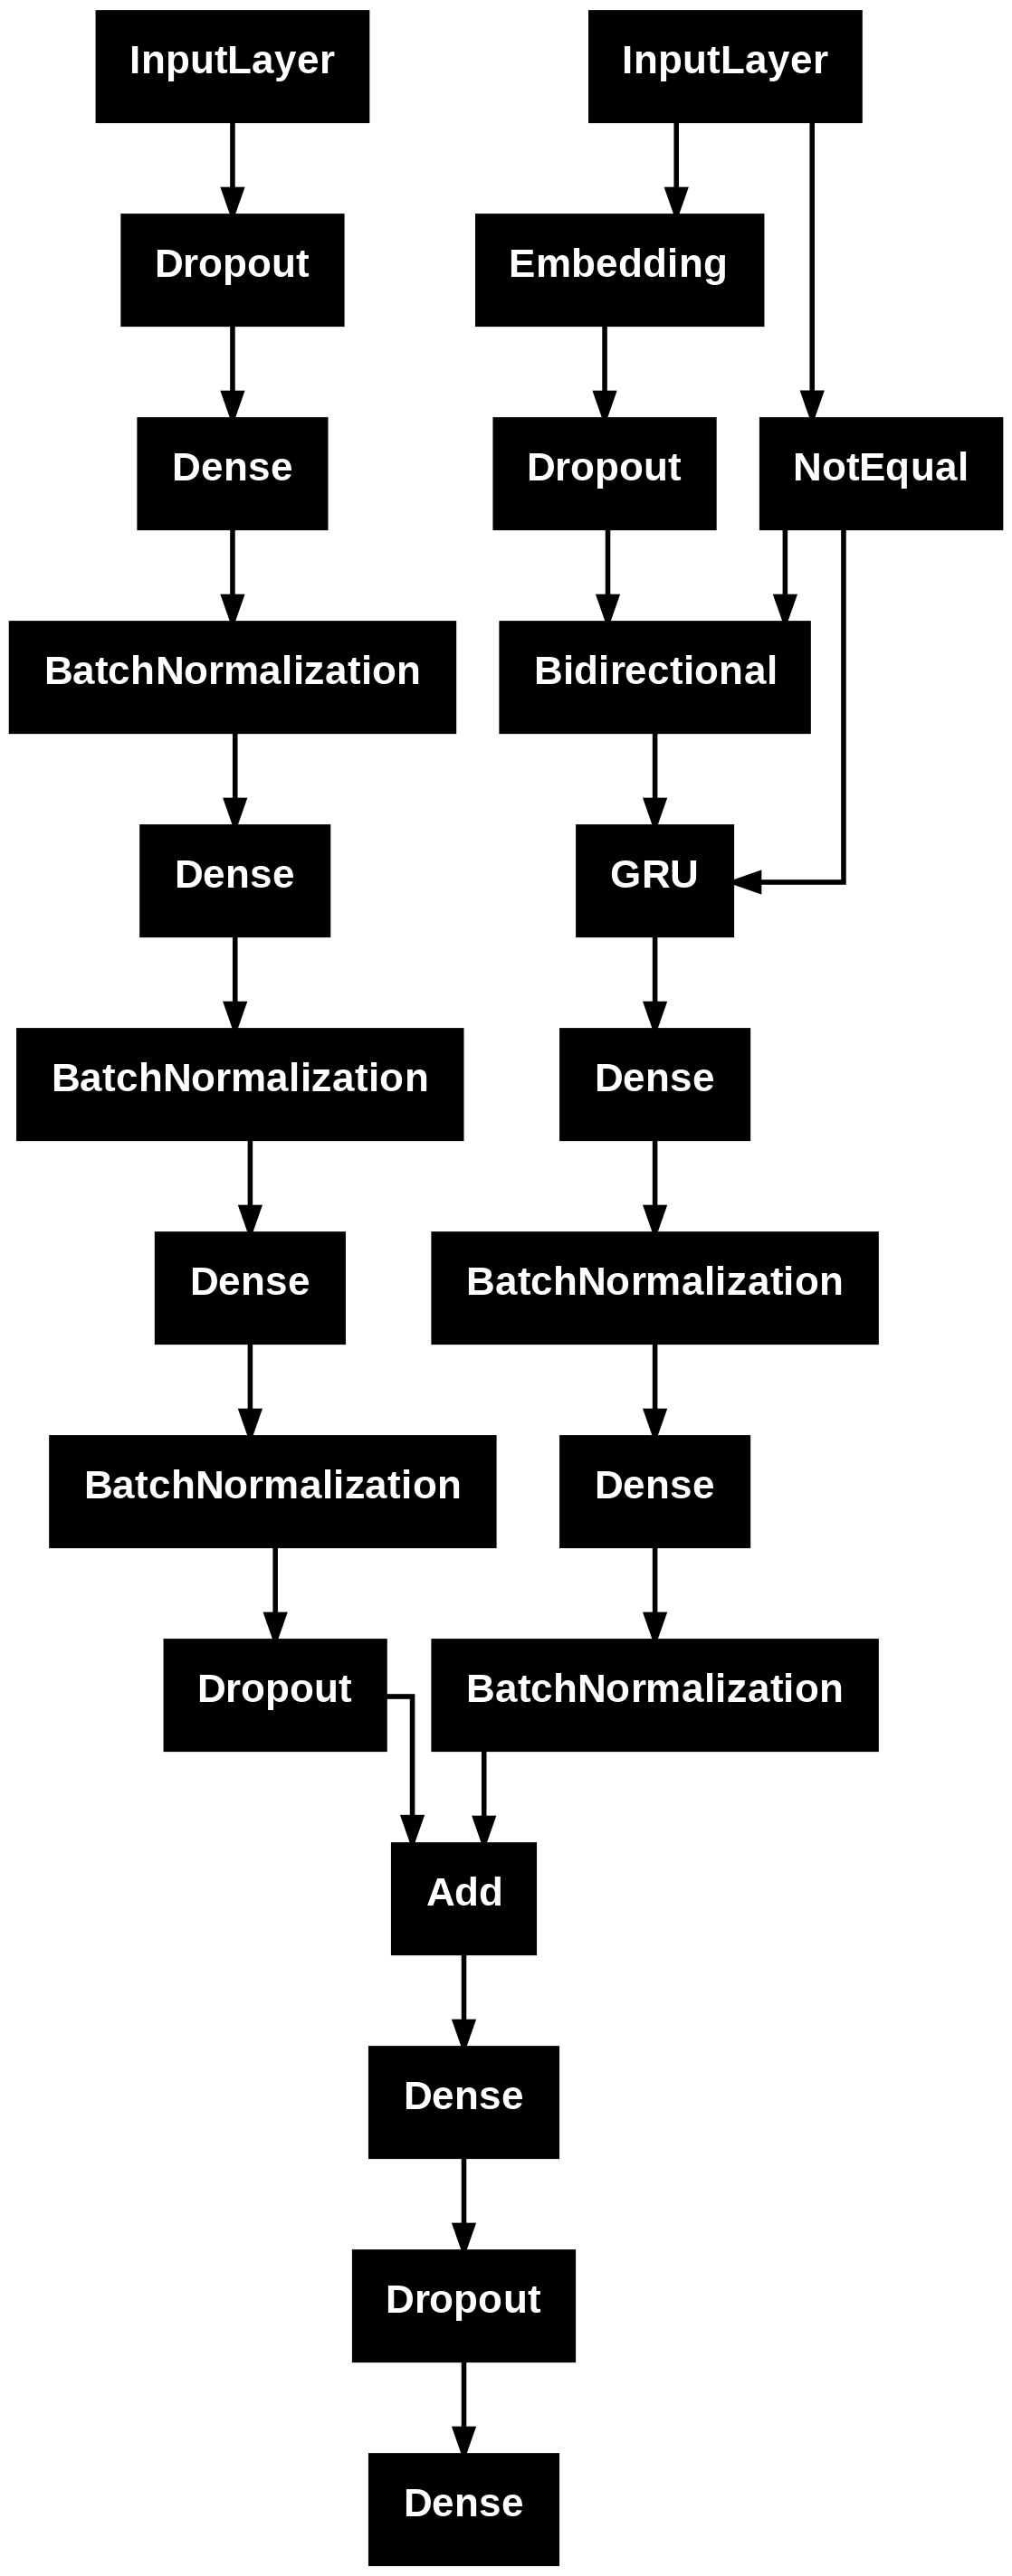

In [ ]:
plot_model(model)

In [ ]:
epochs = 50
batch_size = 32
steps_per_epoch = len(train_desc) // batch_size

In [ ]:
generator = data_generator(train_desc,train_encoded,word_to_idx,batch_size,maxlength = 35)
x, y = next(generator)
print(x)
print(y)

(array([[0.        , 0.        , 1.7041465 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.7041465 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.7041465 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [4.126758  , 0.01791018, 1.4413728 , ..., 0.        , 0.        ,
        0.29379362],
       [4.126758  , 0.01791018, 1.4413728 , ..., 0.        , 0.        ,
        0.29379362],
       [4.126758  , 0.01791018, 1.4413728 , ..., 0.        , 0.        ,
        0.29379362]], dtype=float32), array([[1846,    0,    0, ...,    0,    0,    0],
       [1846,   12,    0, ...,    0,    0,    0],
       [1846,   12,    6, ...,    0,    0,    0],
       ...,
       [1846,    6,   42, ...,    0,    0,    0],
       [1846,    6,   42, ...,    0,    0,    0],
       [1846,    6,   42, ...,    0,    0,    0]], dtype=int32))
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...

In [ ]:
print(len(train_desc))
print(len(train_encoded))

6000
6000


In [ ]:
import tensorflow as tf

In [ ]:
tf.config.run_functions_eagerly(True)

187/187 ━━━━━━━━━━━━━━━━━━━━ 92s 488ms/step - loss: 4.5390
187/187 ━━━━━━━━━━━━━━━━━━━━ 88s 472ms/step - loss: 3.7560
187/187 ━━━━━━━━━━━━━━━━━━━━ 88s 468ms/step - loss: 3.4538
187/187 ━━━━━━━━━━━━━━━━━━━━ 87s 466ms/step - loss: 3.2739
187/187 ━━━━━━━━━━━━━━━━━━━━ 87s 464ms/step - loss: 3.1476
187/187 ━━━━━━━━━━━━━━━━━━━━ 87s 466ms/step - loss: 3.0401
187/187 ━━━━━━━━━━━━━━━━━━━━ 87s 466ms/step - loss: 2.9495
187/187 ━━━━━━━━━━━━━━━━━━━━ 88s 469ms/step - loss: 2.8682
187/187 ━━━━━━━━━━━━━━━━━━━━ 88s 469ms/step - loss: 2.8038
187/187 ━━━━━━━━━━━━━━━━━━━━ 88s 470ms/step - loss: 2.7368


187/187 ━━━━━━━━━━━━━━━━━━━━ 91s 484ms/step - loss: 2.6836
187/187 ━━━━━━━━━━━━━━━━━━━━ 88s 469ms/step - loss: 2.6240
187/187 ━━━━━━━━━━━━━━━━━━━━ 126s 675ms/step - loss: 2.5713
187/187 ━━━━━━━━━━━━━━━━━━━━ 88s 472ms/step - loss: 2.5260
187/187 ━━━━━━━━━━━━━━━━━━━━ 88s 472ms/step - loss: 2.4838
187/187 ━━━━━━━━━━━━━━━━━━━━ 88s 471ms/step - loss: 2.4394
187/187 ━━━━━━━━━━━━━━━━━━━━ 88s 468ms/step - loss: 2.3985
187/187 ━━━━━━━━━━━━━━━━━━━━ 87s 465ms/step - loss: 2.3652
187/187 ━━━━━━━━━━━━━━━━━━━━ 88s 469ms/step - loss: 2.3224
187/187 ━━━━━━━━━━━━━━━━━━━━ 87s 466ms/step - loss: 2.2859


187/187 ━━━━━━━━━━━━━━━━━━━━ 89s 474ms/step - loss: 2.2569
187/187 ━━━━━━━━━━━━━━━━━━━━ 87s 466ms/step - loss: 2.2216
187/187 ━━━━━━━━━━━━━━━━━━━━ 88s 472ms/step - loss: 2.1910
187/187 ━━━━━━━━━━━━━━━━━━━━ 90s 482ms/step - loss: 2.1596
187/187 ━━━━━━━━━━━━━━━━━━━━ 89s 472ms/step - loss: 2.1283
187/187 ━━━━━━━━━━━━━━━━━━━━ 87s 467ms/step - loss: 2.1037
187/187 ━━━━━━━━━━━━━━━━━━━━ 88s 471ms/step - loss: 2.0762
187/187 ━━━━━━━━━━━━━━━━━━━━ 87s 464ms/step - loss: 2.0475
187/187 ━━━━━━━━━━━━━━━━━━━━ 89s 472ms/step - loss: 2.0272
187/187 ━━━━━━━━━━━━━━━━━━━━ 86s 460ms/step - loss: 2.0083


187/187 ━━━━━━━━━━━━━━━━━━━━ 88s 473ms/step - loss: 1.9803
187/187 ━━━━━━━━━━━━━━━━━━━━ 86s 458ms/step - loss: 1.9624
187/187 ━━━━━━━━━━━━━━━━━━━━ 87s 466ms/step - loss: 1.9396
187/187 ━━━━━━━━━━━━━━━━━━━━ 87s 466ms/step - loss: 1.9164
187/187 ━━━━━━━━━━━━━━━━━━━━ 87s 466ms/step - loss: 1.9048
187/187 ━━━━━━━━━━━━━━━━━━━━ 85s 455ms/step - loss: 1.8757
187/187 ━━━━━━━━━━━━━━━━━━━━ 86s 461ms/step - loss: 1.8661
187/187 ━━━━━━━━━━━━━━━━━━━━ 85s 456ms/step - loss: 1.8436
187/187 ━━━━━━━━━━━━━━━━━━━━ 86s 461ms/step - loss: 1.8291
187/187 ━━━━━━━━━━━━━━━━━━━━ 85s 456ms/step - loss: 1.8076


187/187 ━━━━━━━━━━━━━━━━━━━━ 87s 467ms/step - loss: 1.7932
187/187 ━━━━━━━━━━━━━━━━━━━━ 86s 460ms/step - loss: 1.7797
187/187 ━━━━━━━━━━━━━━━━━━━━ 86s 461ms/step - loss: 1.7641
187/187 ━━━━━━━━━━━━━━━━━━━━ 86s 461ms/step - loss: 1.7503
187/187 ━━━━━━━━━━━━━━━━━━━━ 87s 466ms/step - loss: 1.7340
187/187 ━━━━━━━━━━━━━━━━━━━━ 86s 458ms/step - loss: 1.7249
187/187 ━━━━━━━━━━━━━━━━━━━━ 87s 462ms/step - loss: 1.7105
187/187 ━━━━━━━━━━━━━━━━━━━━ 86s 459ms/step - loss: 1.6956
187/187 ━━━━━━━━━━━━━━━━━━━━ 88s 467ms/step - loss: 1.6827
187/187 ━━━━━━━━━━━━━━━━━━━━ 86s 458ms/step - loss: 1.6688


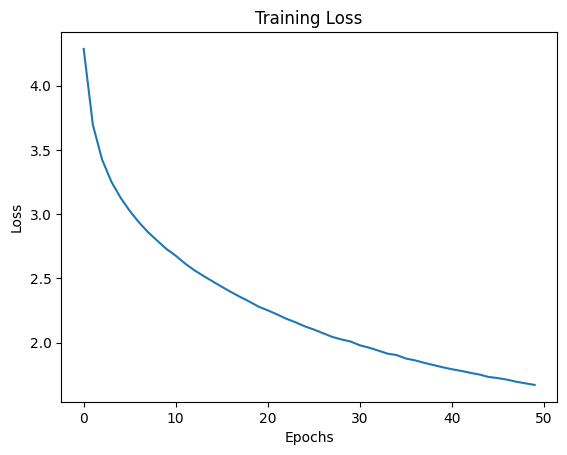

In [ ]:
train()

In [ ]:
with open('/content/drive/MyDrive/Images_Encoded/encoded_testing_features_VGG.pkl', 'rb') as file:
    test_encoded = pickle.load(file)

In [ ]:
def predict(photo):
  in_text = "startseq"
  for i in range(35):
    sequence = [word_to_idx[w] for w in in_text.split() if w in word_to_idx]
    sequence = pad_sequences([sequence],maxlen = 35, padding = 'post')

    y_pred = model.predict([photo,sequence])
    y_pred = y_pred.argmax()

    word = idx_to_word[y_pred]

    in_text += (" "+ word)
    if (word == "endseq"):
      break
  final_cap = in_text.split()
  caption_req = final_cap[1:-1]
  caption_req = " ".join(caption_req)
  return caption_req

In [ ]:
ori_img_path = "Flickr_Data/Flickr_Data/Images/"

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Text(0.5, 1.0, 'man in black shirt is standing in front of building with his arms out')

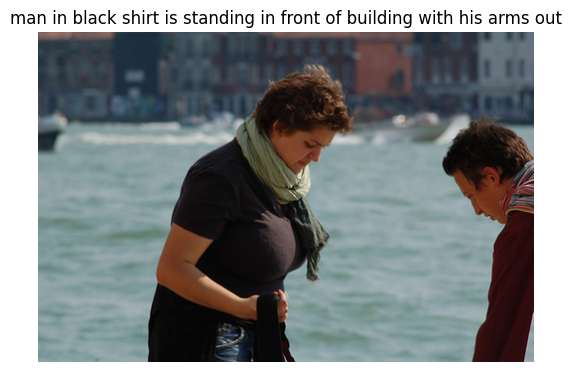

In [ ]:
idx = np.random.randint(0,1000)
all_img_names = list(test_encoded.keys())
img = all_img_names[idx]
photo_2048 = test_encoded[img].reshape((1,4096))
im = plt.imread(ori_img_path+ img)
cap = predict(photo_2048)
plt.imshow(im)
plt.axis("off")
plt.title(cap)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Text(0.5, 1.0, 'brown dog is running through the grass')

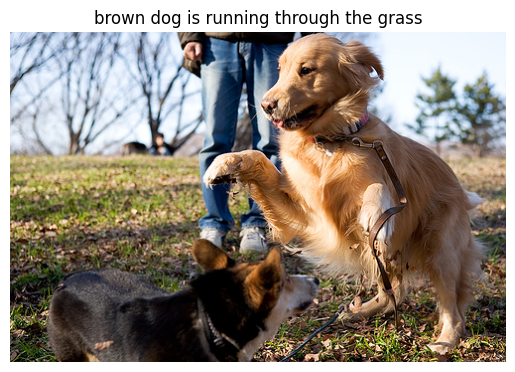

In [ ]:
idx = np.random.randint(0,1000)
all_img_names = list(test_encoded.keys())
img = all_img_names[idx]
photo_2048 = test_encoded[img].reshape((1,4096))
im = plt.imread(ori_img_path+ img)
cap = predict(photo_2048)
plt.imshow(im)
plt.axis("off")
plt.title(cap)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Text(0.5, 1.0, 'boy in blue shirt is kicking soccer ball on field')

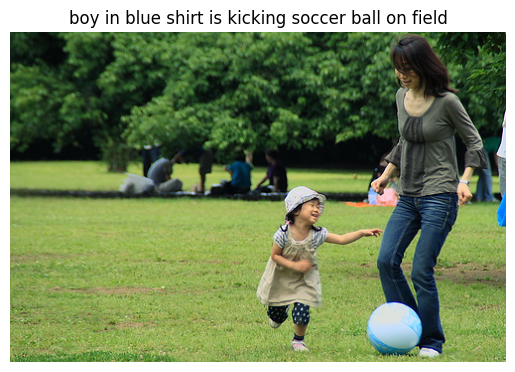

In [ ]:
widx = np.random.randint(0,1000)
all_img_names = list(test_encoded.keys())
img = all_img_names[idx]
photo_2048 = test_encoded[img].reshape((1,4096))
im = plt.imread(ori_img_path+ img)
cap = predict(photo_2048)
plt.imshow(im)
plt.axis("off")
plt.title(cap)